In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from __future__ import print_function
from __future__ import absolute_import
from __future__ import unicode_literals  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import pearsonr

import IPython

sns.set(color_codes=True)

In [2]:
def plot_density(influence_file, balanced=True):
    f = np.load(influence_file)

    actual_loss_diffs = f['actual_loss_diffs']
    predicted_loss_diffs_cg = f['predicted_loss_diffs_cg']
    predicted_loss_diffs_lissa = f['predicted_loss_diffs_lissa']
    indices_to_remove = f['indices_to_remove']
    
    sns.set_style('white')
    fontsize=16
    fig, axs = plt.subplots(1, 3, sharex=True, sharey=False, figsize=(15, 5))
    
    values = np.hstack([actual_loss_diffs, predicted_loss_diffs_cg, predicted_loss_diffs_lissa])
    if balanced:
        scale = max(0.05, np.max(np.abs(values)))
        lim = [-scale, scale]
        ticks = np.arange(-scale, scale, scale / 2 - 1e-7)
    else:
        lim = [np.min(values), np.max(values)]
        expand = (lim[1] - lim[0]) / 10
        lim = [lim[0] - expand, lim[1] + expand]
        ticks = np.arange(lim[0], lim[1], (lim[1] - lim[0]) / 4 - 1e-7)
    
    def scatter_correlation(ax, X, Y, title):
        ax.set_aspect('equal')
        ax.set_xticks(ticks)
        ax.set_yticks(ticks)
        ax.set_xlim(lim)
        ax.set_ylim(lim)
        ax.plot(lim, lim, 'k-', alpha=0.2, zorder=1)
        ax.scatter(actual_loss_diffs, predicted_loss_diffs_cg, zorder=2)
        
        pearson_r, p = scipy.stats.pearsonr(X, Y)
        ax.set_title("{}\nr = {:.3f}, p = {:.3f}".format(title, pearson_r, p), fontsize=fontsize)
    
    def density(ax, observations, title):
        sns.distplot(observations, ax=ax)
        ax.set_title(title, fontsize=fontsize)
        
    for ax in axs:
        ax.set_xlabel('Actual diff in loss', fontsize=fontsize)
    axs[0].set_ylabel('Predicted diff in loss', fontsize=fontsize)
    axs[2].set_ylabel('Frequency', fontsize=fontsize)
    axs[2].yaxis.set_label_position('right')

    scatter_correlation(axs[0], actual_loss_diffs, predicted_loss_diffs_cg, 'Linear (exact)')
    scatter_correlation(axs[1], actual_loss_diffs, predicted_loss_diffs_lissa, 'Linear (approx)')
    density(axs[2], actual_loss_diffs, 'Density')

    # plt.savefig('../figs/fig-approx.png', dpi=600, bbox_inches='tight')

# Remove single example

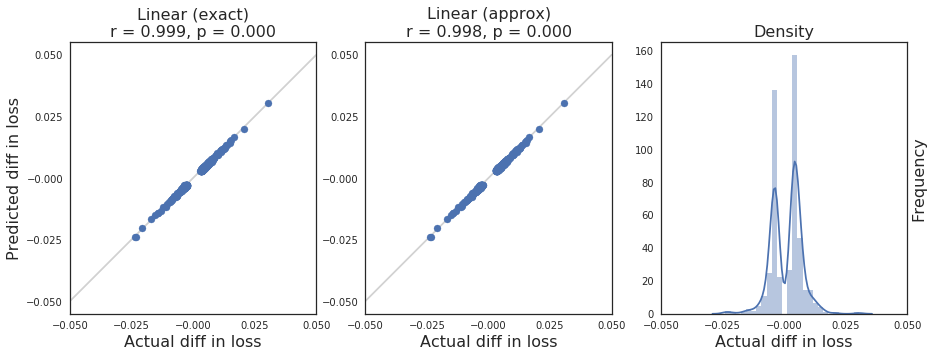

In [3]:
plot_density('../output/mnist_logreg_lbfgs_retraining-500.npz')

# Remove 2 examples

### Random pair


In [ ]:
plot_density('../output/mnist_logreg_lbfgs_sparsity_retraining-2-500-random.npz')

### Random pair from highest abs(inf) examples (90th percentile)

In [ ]:
plot_density('../output/mnist_logreg_lbfgs_sparsity_retraining-2-500-tail.npz')

### Random pair from max and min inf examples (90th percentile)

In [ ]:
plot_density('../output/mnist_logreg_lbfgs_sparsity_retraining-2-500-tail_pos.npz', balanced=False)

In [ ]:
plot_density('../output/mnist_logreg_lbfgs_sparsity_retraining-2-500-tail_neg.npz', balanced=False)

# Remove 10 examples

### Random

In [ ]:
plot_density('../output/mnist_logreg_lbfgs_sparsity_retraining-10-500-random.npz')

### Random from both tails

In [ ]:
plot_density('../output/mnist_logreg_lbfgs_sparsity_retraining-10-500-tail.npz')

### Random from each tail, separately

In [ ]:
plot_density('../output/mnist_logreg_lbfgs_sparsity_retraining-10-500-tail_pos.npz', balanced=False)

In [ ]:
plot_density('../output/mnist_logreg_lbfgs_sparsity_retraining-10-500-tail_neg.npz', balanced=False)

# Remove 100 examples

### Random

In [ ]:
plot_density('../output/mnist_logreg_lbfgs_sparsity_retraining-100-500-random.npz')

### Random from both tails

In [ ]:
plot_density('../output/mnist_logreg_lbfgs_sparsity_retraining-100-500-tail.npz')

### Random from each tail, separately

In [ ]:
plot_density('../output/mnist_logreg_lbfgs_sparsity_retraining-100-500-tail_pos.npz', balanced=False)

In [ ]:
plot_density('../output/mnist_logreg_lbfgs_sparsity_retraining-100-500-tail_neg.npz', balanced=False)

# Remove 500 examples (about 10%, N = 5500)

### Random

In [ ]:
plot_density('../output/mnist_logreg_lbfgs_sparsity_retraining-500-500-random.npz')

### Random from both tails

In [ ]:
plot_density('../output/mnist_logreg_lbfgs_sparsity_retraining-500-500-tail.npz')

### Random from each tail, separately

In [ ]:
plot_density('../output/mnist_logreg_lbfgs_sparsity_retraining-500-500-tail_pos.npz', balanced=False)

In [ ]:
plot_density('../output/mnist_logreg_lbfgs_sparsity_retraining-500-500-tail_neg.npz', balanced=False)